In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score

import math
from SALib.sample import saltelli
from SALib.analyze import sobol


import warnings
warnings.filterwarnings("ignore")

In [2]:
dfX_raw = pd.read_csv('./features.csv',index_col=0)
dfY = pd.read_csv('./labels.csv',index_col=0)

In [3]:
scaler = MinMaxScaler( )
scaler.fit(dfX_raw)
scaler.data_max_
dfX=scaler.transform(dfX_raw)
dfX

array([[0.1815908 , 0.37118559, 0.995998  , ..., 0.07303652, 0.71685843,
        0.46373187],
       [0.64732366, 0.4072036 , 0.6198099 , ..., 0.96048024, 0.01050525,
        0.90795398],
       [0.95047524, 0.96748374, 0.31015508, ..., 0.99749875, 0.97298649,
        0.4172086 ],
       ...,
       [0.28364182, 0.17858929, 0.1885943 , ..., 0.67933967, 0.72286143,
        0.20510255],
       [0.45272636, 0.59429715, 0.33266633, ..., 0.43721861, 0.84942471,
        0.72436218],
       [0.07953977, 0.56878439, 0.03151576, ..., 0.11655828, 0.57878939,
        0.63681841]])

In [4]:
scaler = MinMaxScaler( )
scaler.fit(dfY)
scaler.data_max_
dfy=scaler.transform(dfY)
dfy

array([[0.9817669 , 0.85625751, 0.98992639, ..., 0.98362136, 0.74180602,
        0.72449331],
       [0.81193176, 0.99507821, 0.95277331, ..., 0.84586908, 1.        ,
        1.        ],
       [0.88185779, 0.96099831, 0.97033268, ..., 0.90410615, 0.89275885,
        0.89571738],
       ...,
       [0.93418505, 0.90141613, 0.97946721, ..., 0.94611361, 0.80325228,
        0.80035275],
       [0.92020028, 0.91935482, 0.97543564, ..., 0.93198669, 0.8343599 ,
        0.8298908 ],
       [0.94066634, 0.89716507, 0.97418473, ..., 0.94565693, 0.79697734,
        0.78592362]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=123)

In [6]:
X_columns = dfX_raw.columns.values[:]
x_columns = X_columns.tolist()

In [7]:
Y_columns = dfY.columns.values[:]
y_columns = Y_columns.tolist()

In [8]:
# Define the model inputs
problem = {'num_vars': 12,
           'names': x_columns,
           'bounds': [[dfX[:,0].min(), dfX[:,0].max()],
                      [dfX[:,1].min(), dfX[:,1].max()],
                      [dfX[:,2].min(), dfX[:,2].max()],
                      [dfX[:,3].min(), dfX[:,3].max()],
                      [dfX[:,4].min(), dfX[:,4].max()],
                      [dfX[:,5].min(), dfX[:,5].max()],
                      [dfX[:,6].min(), dfX[:,6].max()],
                      [dfX[:,7].min(), dfX[:,7].max()],
                      [dfX[:,8].min(), dfX[:,8].max()],
                      [dfX[:,9].min(), dfX[:,9].max()],
                      [dfX[:,10].min(), dfX[:,10].max()],
                      [dfX[:,11].min(), dfX[:,11].max()]]}
problem

{'num_vars': 12,
 'names': ['CQao',
  'Plv,0',
  'Vlv,0',
  'Vlv',
  'CQmi',
  'Pla,0',
  'Vla,0',
  'Vla',
  'Elv,s',
  'Elv,d',
  'Ela,max',
  'Ela,min'],
 'bounds': [[0.0, 1.0],
  [0.0, 1.0],
  [0.0, 0.9999999999999996],
  [0.0, 1.0],
  [0.0, 1.0],
  [0.0, 1.0],
  [0.0, 1.0],
  [0.0, 0.9999999999999996],
  [0.0, 0.9999999999999996],
  [0.0, 1.0],
  [0.0, 1.0],
  [0.0, 1.0]]}

In [9]:
# Generate samples
param_values = saltelli.sample(problem, 1000)

In [10]:
# Gradient Tree Boosting for Regression

n_estimators = [50, 100, 200]
max_depth = [2, 4, 8]
min_samples_split = [3, 5]
learning_rate = [0.1, 0.01]
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, learning_rate = learning_rate)

# feel free to run this cell here and it will not take a lot of time
grid_regression = GridSearchCV(GradientBoostingRegressor(), param_grid = param_grid, 
                               cv = 5, scoring = 'neg_mean_squared_error')
grid_regression.fit(X_train, y_train[:,0])

# Training a Gradient Boosting using the best value for the n_estimators
grad_tree_boos_reg = GradientBoostingRegressor(n_estimators = grid_regression.best_params_["n_estimators"], 
                                               max_depth = grid_regression.best_params_["max_depth"], 
                                               min_samples_split = grid_regression.best_params_["min_samples_split"], 
                                               learning_rate = grid_regression.best_params_["learning_rate"])
grad_tree_boos_reg.fit(X_train, y_train[:,0])
test_predictions = grad_tree_boos_reg.predict(X_test)

# Computing the RMSE for the validation dataset
error_grad_tree_boos_reg = np.sqrt(mean_squared_error(y_test[:,0], test_predictions))
print('The RMSE on the validation data is :', error_grad_tree_boos_reg)


The RMSE on the validation data is : 0.1483506993414781


               ST   ST_conf
CQao     0.717690  0.123619
Plv,0    0.006631  0.006207
Vlv,0    0.004595  0.003101
Vlv      0.000068  0.000071
CQmi     0.001592  0.001093
Pla,0    0.008049  0.006793
Vla,0    0.030046  0.017104
Vla      0.011270  0.006944
Elv,s    0.316378  0.091266
Elv,d    0.211735  0.040369
Ela,max  0.014228  0.007060
Ela,min  0.024720  0.014865
               S1   S1_conf
CQao     0.400075  0.126789
Plv,0    0.001584  0.003467
Vlv,0    0.004099  0.005218
Vlv     -0.000098  0.000263
CQmi    -0.000583  0.004251
Pla,0   -0.001459  0.012275
Vla,0    0.001747  0.016524
Vla      0.004121  0.005101
Elv,s    0.038702  0.044284
Elv,d    0.150592  0.036490
Ela,max -0.000394  0.004750
Ela,min  0.012134  0.011796
                          S2   S2_conf
(CQao, Plv,0)       0.006288  0.165239
(CQao, Vlv,0)       0.016665  0.170586
(CQao, Vlv)         0.014447  0.169713
(CQao, CQmi)        0.014241  0.169181
(CQao, Pla,0)       0.016478  0.169518
...                      ...       ...

Text(0.5, 1.0, 'S1')

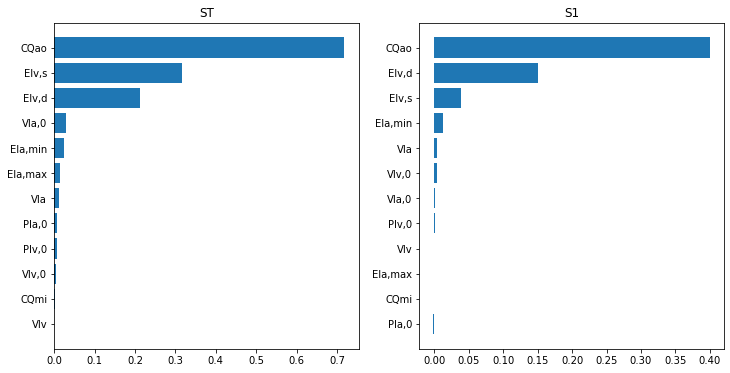

In [11]:
# predict
Y = grad_tree_boos_reg.predict(param_values)
Si = sobol.analyze(problem, Y, print_to_console=True)
Si_df = Si.to_df()

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sorted_idx = np.argsort(Si_df[0]['ST'])
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, Si_df[0]['ST'][sorted_idx], align='center')
plt.yticks(pos, np.array(X_columns)[sorted_idx])
plt.title('ST')

plt.subplot(1, 2, 2)
sorted_idx = np.argsort(Si_df[1]['S1'])
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, Si_df[1]['S1'][sorted_idx], align='center')
plt.yticks(pos, np.array(X_columns)[sorted_idx])
plt.title('S1')


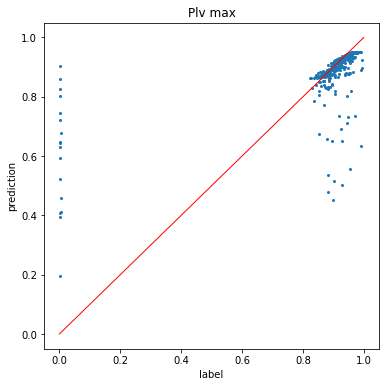

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlabel('label')
ax.set_ylabel('prediction')
ax.set_title('Plv max')
ax.plot(y_test[:,0], test_predictions, "o", markersize=2)
x = np.linspace(0,1,50)
y = x
plt.plot(x,y, color='red', linewidth=1)



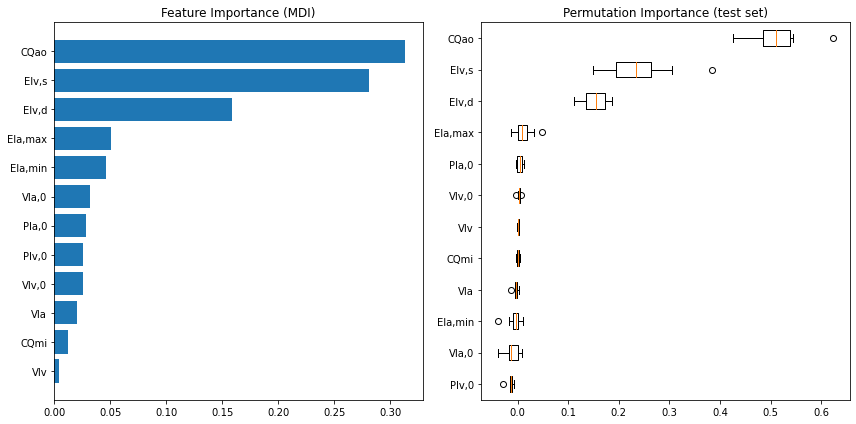

In [13]:
feature_importance = grad_tree_boos_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(grad_tree_boos_reg, X_test, y_test[:,0], n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(X_columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [14]:
feature_importance

array([0.31359275, 0.02611795, 0.02583702, 0.00407086, 0.01274941,
       0.02831086, 0.03191584, 0.02011406, 0.28096786, 0.15892577,
       0.05091368, 0.04648394])

Plv max
The RMSE on the validation data is : 0.14813969040644878
               ST   ST_conf
CQao     0.724885  0.132983
Plv,0    0.006369  0.005015
Vlv,0    0.003780  0.002233
Vlv      0.000020  0.000016
CQmi     0.002683  0.001587
Pla,0    0.008403  0.006787
Vla,0    0.031299  0.017195
Vla      0.013348  0.006674
Elv,s    0.315245  0.083617
Elv,d    0.211080  0.039498
Ela,max  0.012969  0.008267
Ela,min  0.023726  0.014545
               S1   S1_conf
CQao     0.401870  0.119926
Plv,0    0.001590  0.003040
Vlv,0    0.003290  0.004736
Vlv     -0.000043  0.000153
CQmi    -0.000831  0.003808
Pla,0   -0.000694  0.015014
Vla,0    0.001938  0.018634
Vla      0.004454  0.004919
Elv,s    0.041418  0.044552
Elv,d    0.151114  0.037229
Ela,max -0.000242  0.004514
Ela,min  0.011934  0.012558
                          S2   S2_conf
(CQao, Plv,0)       0.008148  0.161081
(CQao, Vlv,0)       0.018806  0.166812
(CQao, Vlv)         0.016841  0.166368
(CQao, CQmi)        0.018818  0.166908
(CQao, Pla,0

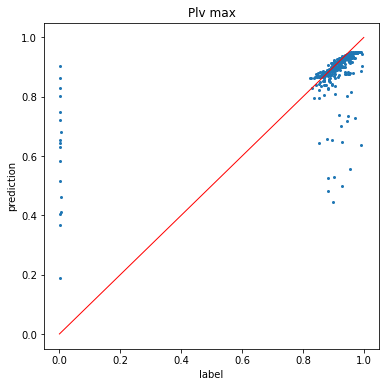

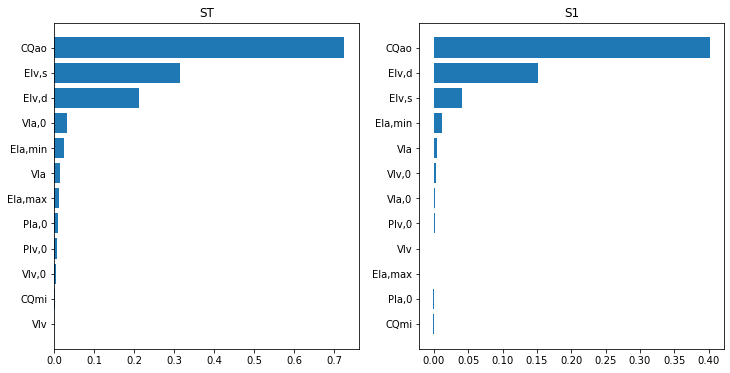

Plv min
The RMSE on the validation data is : 0.133270921491397
               ST   ST_conf
CQao     0.739950  0.116901
Plv,0    0.002068  0.001758
Vlv,0    0.000636  0.000456
Vlv      0.000960  0.000253
CQmi     0.001128  0.000470
Pla,0    0.000313  0.000218
Vla,0    0.000489  0.000206
Vla      0.002268  0.001561
Elv,s    0.475537  0.097863
Elv,d    0.015085  0.002862
Ela,max  0.001274  0.001382
Ela,min  0.002449  0.001632
               S1   S1_conf
CQao     0.478702  0.110309
Plv,0   -0.000697  0.004270
Vlv,0   -0.000504  0.002554
Vlv      0.002215  0.002069
CQmi     0.000189  0.002269
Pla,0   -0.000372  0.001723
Vla,0   -0.000319  0.001318
Vla      0.000675  0.004262
Elv,s    0.187796  0.057472
Elv,d    0.008389  0.009532
Ela,max  0.000017  0.001761
Ela,min  0.001023  0.003130
                          S2   S2_conf
(CQao, Plv,0)      -0.021754  0.175539
(CQao, Vlv,0)      -0.021939  0.175364
(CQao, Vlv)        -0.017694  0.175557
(CQao, CQmi)       -0.020544  0.175691
(CQao, Pla,0) 

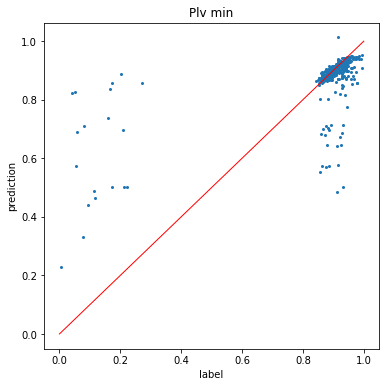

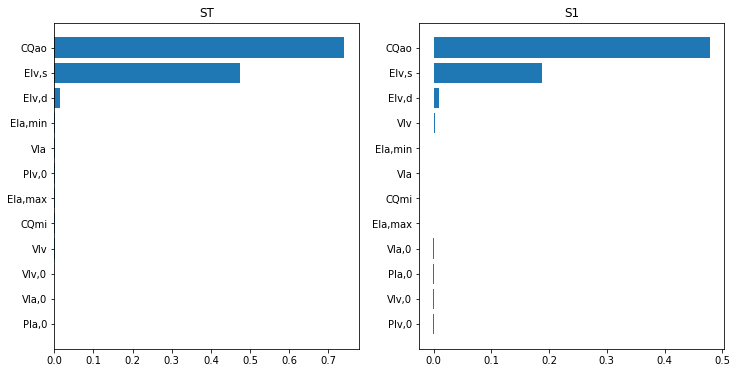

Prv max
The RMSE on the validation data is : 0.15709209761267964
                   ST       ST_conf
CQao     8.394080e-01  1.768867e-01
Plv,0    1.407383e-03  1.322661e-03
Vlv,0    1.038070e-02  6.709200e-03
Vlv      4.463266e-03  2.941044e-03
CQmi     4.234218e-03  3.262217e-03
Pla,0    3.383482e-09  3.758431e-09
Vla,0    1.152462e-02  4.963827e-03
Vla      6.721018e-03  5.096022e-03
Elv,s    3.193419e-01  9.326612e-02
Elv,d    2.236457e-02  4.902350e-03
Ela,max  0.000000e+00  0.000000e+00
Ela,min  3.146592e-03  1.352995e-03
                   S1   S1_conf
CQao     5.958963e-01  0.131111
Plv,0    9.347944e-04  0.003462
Vlv,0    2.409588e-03  0.007908
Vlv      1.371262e-03  0.003388
CQmi    -2.333553e-03  0.003014
Pla,0   -3.961028e-07  0.000006
Vla,0   -4.068698e-04  0.005663
Vla      3.683175e-03  0.022355
Elv,s    2.786511e-02  0.035799
Elv,d    1.672473e-02  0.009256
Ela,max  0.000000e+00  0.000000
Ela,min  9.116093e-04  0.003637
                              S2       S2_conf
(CQa

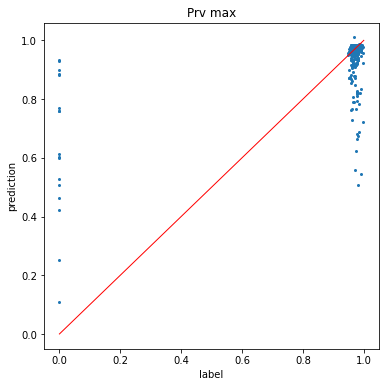

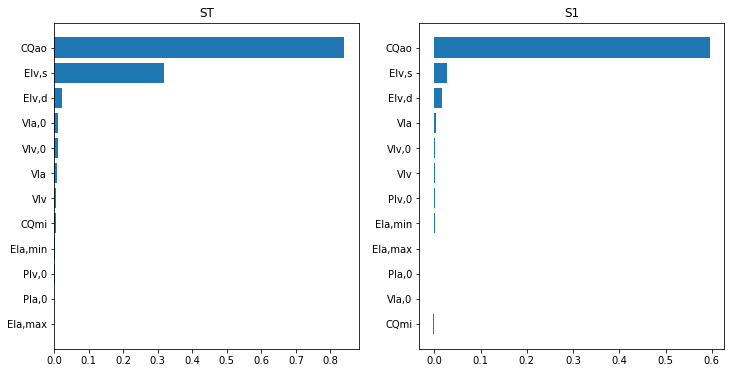

Prv min
The RMSE on the validation data is : 0.16773860199290466
               ST   ST_conf
CQao     0.843835  0.133480
Plv,0    0.002840  0.001957
Vlv,0    0.003489  0.002615
Vlv      0.000294  0.000057
CQmi     0.000394  0.000497
Pla,0    0.000371  0.000256
Vla,0    0.002911  0.001514
Vla      0.002492  0.001314
Elv,s    0.348681  0.092923
Elv,d    0.030085  0.005916
Ela,max  0.000655  0.000521
Ela,min  0.003104  0.001887
               S1   S1_conf
CQao     0.579035  0.110551
Plv,0   -0.000924  0.007839
Vlv,0    0.000710  0.003432
Vlv      0.000519  0.001354
CQmi    -0.003600  0.006678
Pla,0   -0.000347  0.001728
Vla,0   -0.000850  0.004498
Vla      0.000970  0.008107
Elv,s    0.051382  0.043601
Elv,d    0.017637  0.016131
Ela,max -0.000112  0.000842
Ela,min  0.000730  0.002931
                          S2   S2_conf
(CQao, Plv,0)      -0.022073  0.172133
(CQao, Vlv,0)      -0.018416  0.174672
(CQao, Vlv)        -0.024145  0.171935
(CQao, CQmi)       -0.020805  0.171871
(CQao, Pla,0

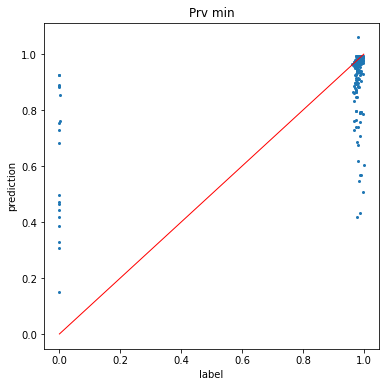

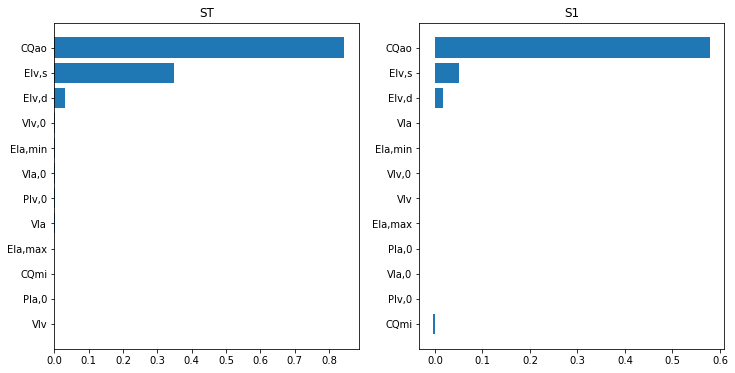

Qpo max
The RMSE on the validation data is : 0.13071575018462467
               ST   ST_conf
CQao     0.603788  0.100517
Plv,0    0.003145  0.002079
Vlv,0    0.012827  0.009169
Vlv      0.002964  0.004627
CQmi     0.002247  0.002332
Pla,0    0.000501  0.000438
Vla,0    0.040635  0.020855
Vla      0.003914  0.004175
Elv,s    0.298806  0.090090
Elv,d    0.461667  0.086555
Ela,max  0.006971  0.004399
Ela,min  0.016034  0.009938
               S1   S1_conf
CQao     0.254844  0.079844
Plv,0    0.000135  0.002935
Vlv,0    0.008512  0.014801
Vlv      0.002522  0.003743
CQmi    -0.001149  0.003183
Pla,0   -0.000342  0.000824
Vla,0   -0.005102  0.014773
Vla      0.000317  0.005206
Elv,s    0.021647  0.041032
Elv,d    0.281050  0.050588
Ela,max  0.002168  0.006575
Ela,min  0.005177  0.006336
                          S2   S2_conf
(CQao, Plv,0)       0.043859  0.128256
(CQao, Vlv,0)       0.045669  0.126723
(CQao, Vlv)         0.032369  0.127360
(CQao, CQmi)        0.043772  0.128949
(CQao, Pla,0

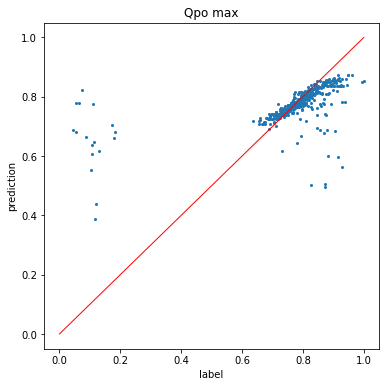

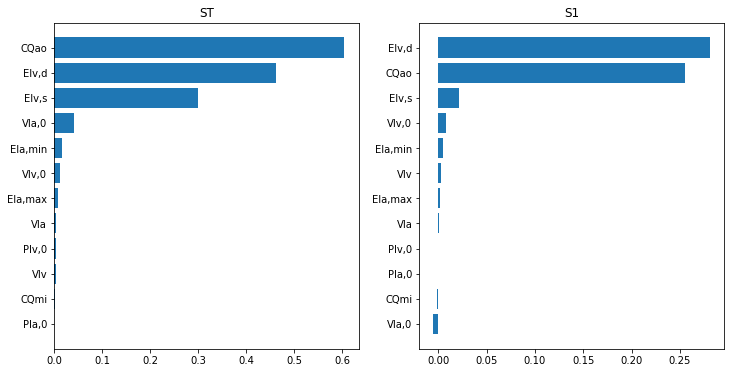

Qpo min
The RMSE on the validation data is : 0.0
         ST  ST_conf
CQao    NaN      NaN
Plv,0   NaN      NaN
Vlv,0   NaN      NaN
Vlv     NaN      NaN
CQmi    NaN      NaN
Pla,0   NaN      NaN
Vla,0   NaN      NaN
Vla     NaN      NaN
Elv,s   NaN      NaN
Elv,d   NaN      NaN
Ela,max NaN      NaN
Ela,min NaN      NaN
         S1  S1_conf
CQao    NaN      NaN
Plv,0   NaN      NaN
Vlv,0   NaN      NaN
Vlv     NaN      NaN
CQmi    NaN      NaN
Pla,0   NaN      NaN
Vla,0   NaN      NaN
Vla     NaN      NaN
Elv,s   NaN      NaN
Elv,d   NaN      NaN
Ela,max NaN      NaN
Ela,min NaN      NaN
                    S2  S2_conf
(CQao, Plv,0)      NaN      NaN
(CQao, Vlv,0)      NaN      NaN
(CQao, Vlv)        NaN      NaN
(CQao, CQmi)       NaN      NaN
(CQao, Pla,0)      NaN      NaN
...                 ..      ...
(Elv,s, Ela,max)   NaN      NaN
(Elv,s, Ela,min)   NaN      NaN
(Elv,d, Ela,max)   NaN      NaN
(Elv,d, Ela,min)   NaN      NaN
(Ela,max, Ela,min) NaN      NaN

[66 rows x 2 columns

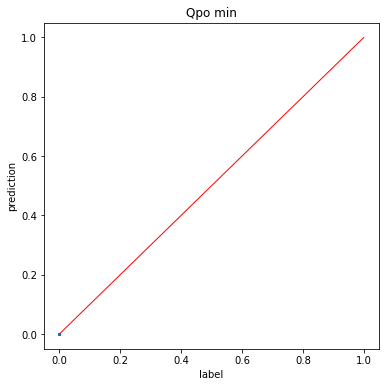

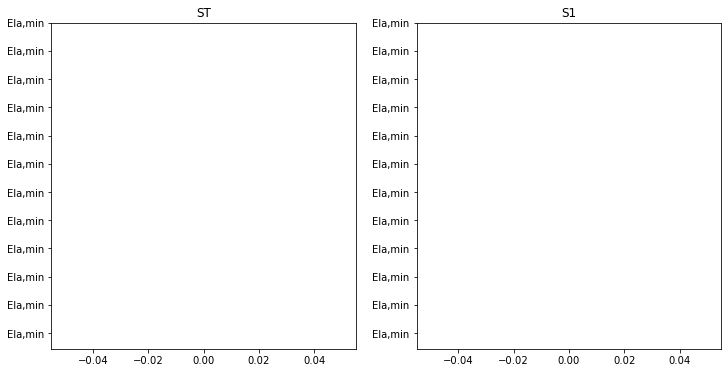

Qao max
The RMSE on the validation data is : 0.1532061728132099
               ST   ST_conf
CQao     0.800810  0.144457
Plv,0    0.000751  0.000686
Vlv,0    0.007728  0.004217
Vlv      0.001270  0.000744
CQmi     0.004043  0.003280
Pla,0    0.000075  0.000079
Vla,0    0.012754  0.004946
Vla      0.007051  0.004999
Elv,s    0.273334  0.086655
Elv,d    0.078462  0.016657
Ela,max  0.000953  0.001401
Ela,min  0.007030  0.003946
               S1   S1_conf
CQao     0.608349  0.121370
Plv,0    0.000484  0.002674
Vlv,0    0.005450  0.007756
Vlv      0.000611  0.001885
CQmi    -0.002080  0.003958
Pla,0   -0.000064  0.000633
Vla,0   -0.002476  0.007132
Vla      0.002977  0.015457
Elv,s    0.027014  0.037736
Elv,d    0.062840  0.024656
Ela,max -0.000852  0.001565
Ela,min  0.001309  0.004113
                          S2   S2_conf
(CQao, Plv,0)      -0.045894  0.192570
(CQao, Vlv,0)      -0.039733  0.195194
(CQao, Vlv)        -0.043157  0.194126
(CQao, CQmi)       -0.038467  0.190858
(CQao, Pla,0)

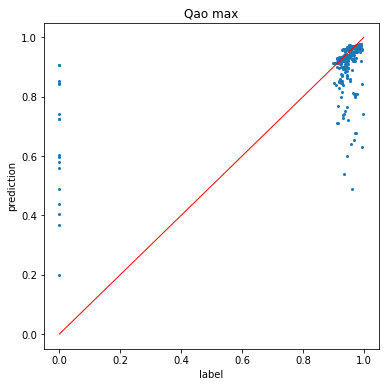

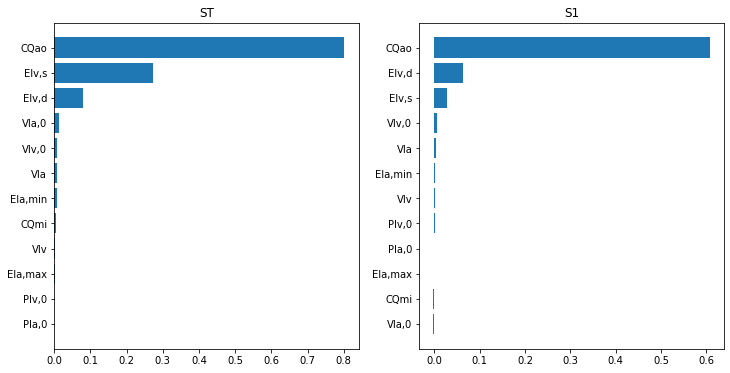

Qao min
The RMSE on the validation data is : 0.0
         ST  ST_conf
CQao    NaN      NaN
Plv,0   NaN      NaN
Vlv,0   NaN      NaN
Vlv     NaN      NaN
CQmi    NaN      NaN
Pla,0   NaN      NaN
Vla,0   NaN      NaN
Vla     NaN      NaN
Elv,s   NaN      NaN
Elv,d   NaN      NaN
Ela,max NaN      NaN
Ela,min NaN      NaN
         S1  S1_conf
CQao    NaN      NaN
Plv,0   NaN      NaN
Vlv,0   NaN      NaN
Vlv     NaN      NaN
CQmi    NaN      NaN
Pla,0   NaN      NaN
Vla,0   NaN      NaN
Vla     NaN      NaN
Elv,s   NaN      NaN
Elv,d   NaN      NaN
Ela,max NaN      NaN
Ela,min NaN      NaN
                    S2  S2_conf
(CQao, Plv,0)      NaN      NaN
(CQao, Vlv,0)      NaN      NaN
(CQao, Vlv)        NaN      NaN
(CQao, CQmi)       NaN      NaN
(CQao, Pla,0)      NaN      NaN
...                 ..      ...
(Elv,s, Ela,max)   NaN      NaN
(Elv,s, Ela,min)   NaN      NaN
(Elv,d, Ela,max)   NaN      NaN
(Elv,d, Ela,min)   NaN      NaN
(Ela,max, Ela,min) NaN      NaN

[66 rows x 2 columns

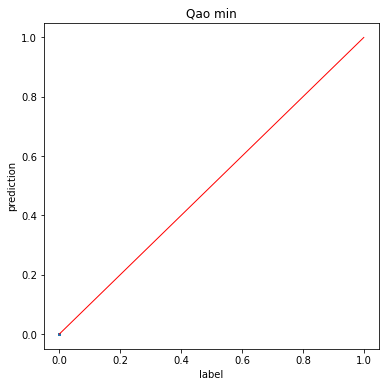

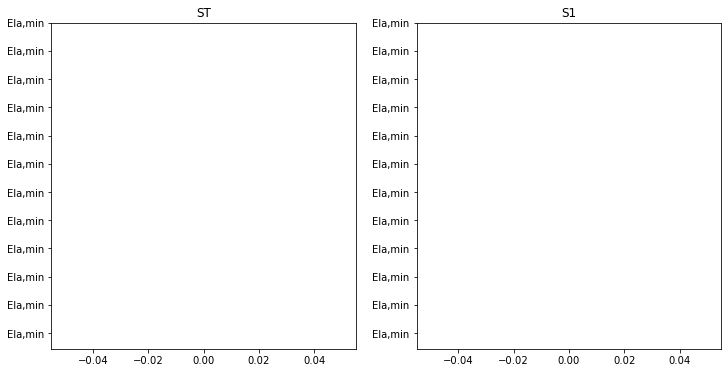

Psvn max
The RMSE on the validation data is : 0.1498339346595899
               ST   ST_conf
CQao     0.775837  0.126158
Plv,0    0.001034  0.001020
Vlv,0    0.010002  0.005905
Vlv      0.001179  0.000705
CQmi     0.001955  0.001339
Pla,0    0.000065  0.000056
Vla,0    0.016457  0.006536
Vla      0.008197  0.007171
Elv,s    0.222544  0.058589
Elv,d    0.131038  0.021669
Ela,max  0.000235  0.000048
Ela,min  0.014610  0.009735
               S1   S1_conf
CQao     0.598918  0.121951
Plv,0   -0.003014  0.008791
Vlv,0    0.004402  0.007305
Vlv      0.000423  0.002180
CQmi    -0.004216  0.009350
Pla,0   -0.000113  0.000498
Vla,0   -0.003271  0.007707
Vla     -0.000331  0.007085
Elv,s    0.020175  0.035670
Elv,d    0.114465  0.034409
Ela,max  0.000070  0.001234
Ela,min  0.000278  0.006650
                          S2   S2_conf
(CQao, Plv,0)      -0.043167  0.178063
(CQao, Vlv,0)      -0.039175  0.181589
(CQao, Vlv)        -0.045378  0.180968
(CQao, CQmi)       -0.040843  0.177731
(CQao, Pla,0

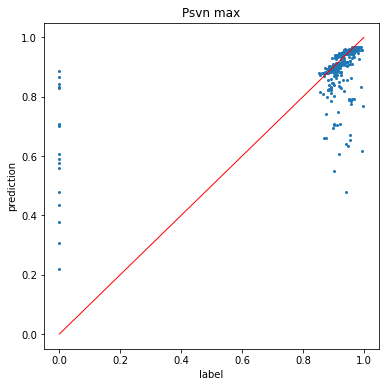

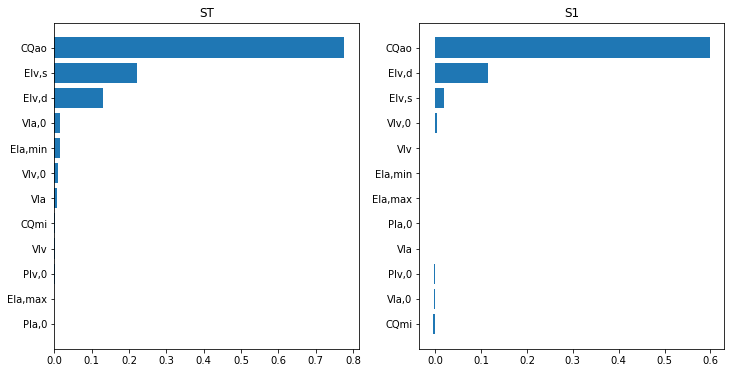

Psvn min
The RMSE on the validation data is : 0.15673986767992237
               ST   ST_conf
CQao     0.805280  0.123273
Plv,0    0.003277  0.002042
Vlv,0    0.001061  0.000567
Vlv      0.000074  0.000013
CQmi     0.000394  0.000501
Pla,0    0.000366  0.000290
Vla,0    0.002450  0.001245
Vla      0.002205  0.001772
Elv,s    0.283176  0.076746
Elv,d    0.108998  0.017077
Ela,max  0.001659  0.001232
Ela,min  0.003474  0.001729
               S1   S1_conf
CQao     0.585920  0.102593
Plv,0   -0.000711  0.008216
Vlv,0    0.000699  0.002482
Vlv      0.000212  0.000730
CQmi    -0.003329  0.007175
Pla,0   -0.000313  0.001693
Vla,0   -0.001760  0.004184
Vla     -0.001176  0.004765
Elv,s    0.023805  0.044967
Elv,d    0.092728  0.027995
Ela,max -0.001021  0.002240
Ela,min  0.000471  0.003692
                          S2   S2_conf
(CQao, Plv,0)      -0.028948  0.152649
(CQao, Vlv,0)      -0.031210  0.156291
(CQao, Vlv)        -0.031798  0.154780
(CQao, CQmi)       -0.028064  0.152329
(CQao, Pla,

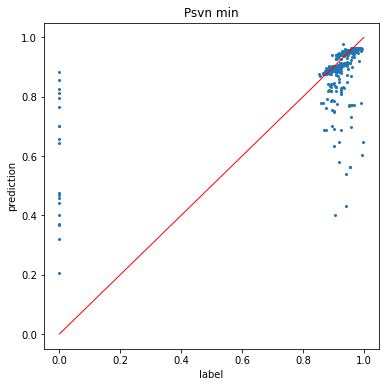

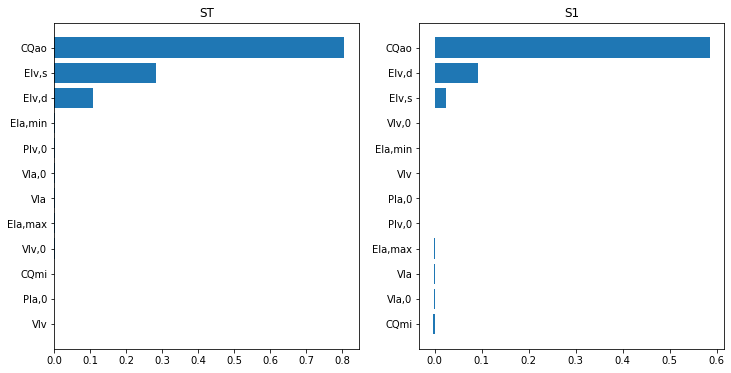

Pvn max
The RMSE on the validation data is : 0.14141702771496184
               ST   ST_conf
CQao     0.653050  0.117758
Plv,0    0.002136  0.000895
Vlv,0    0.005268  0.003125
Vlv      0.000000  0.000000
CQmi     0.000975  0.000679
Pla,0    0.000114  0.000199
Vla,0    0.004213  0.001812
Vla      0.013095  0.012243
Elv,s    0.409421  0.084487
Elv,d    0.098182  0.016889
Ela,max  0.006977  0.004898
Ela,min  0.013591  0.003630
               S1   S1_conf
CQao     0.432090  0.101908
Plv,0   -0.001552  0.004831
Vlv,0    0.006583  0.005286
Vlv      0.000000  0.000000
CQmi    -0.000748  0.001741
Pla,0    0.000687  0.001436
Vla,0    0.000377  0.003978
Vla      0.014366  0.041190
Elv,s    0.168011  0.045937
Elv,d    0.090359  0.033039
Ela,max  0.005154  0.005360
Ela,min  0.006632  0.011372
                          S2   S2_conf
(CQao, Plv,0)      -0.021895  0.148236
(CQao, Vlv,0)      -0.019123  0.150722
(CQao, Vlv)        -0.023239  0.148935
(CQao, CQmi)       -0.021509  0.149870
(CQao, Pla,0

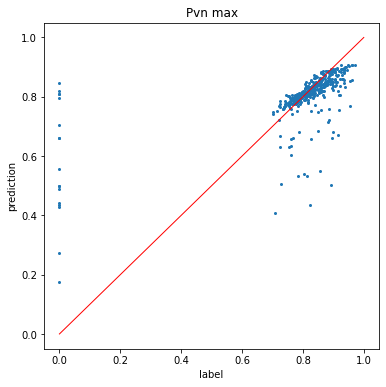

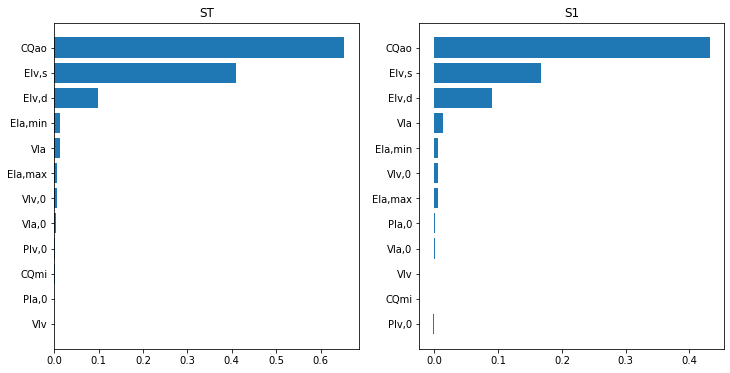

Pvn min
The RMSE on the validation data is : 0.14581148278940126
               ST   ST_conf
CQao     0.688166  0.106041
Plv,0    0.000887  0.000829
Vlv,0    0.000484  0.000302
Vlv      0.000623  0.000350
CQmi     0.000130  0.000077
Pla,0    0.000655  0.000356
Vla,0    0.001703  0.000725
Vla      0.004857  0.004181
Elv,s    0.433188  0.090260
Elv,d    0.088533  0.012996
Ela,max  0.003534  0.002913
Ela,min  0.003645  0.000752
               S1   S1_conf
CQao     0.437778  0.107883
Plv,0   -0.000610  0.001655
Vlv,0    0.000127  0.002150
Vlv      0.001212  0.001703
CQmi     0.000400  0.000856
Pla,0   -0.000291  0.001726
Vla,0   -0.000266  0.002725
Vla      0.005508  0.012535
Elv,s    0.178547  0.052546
Elv,d    0.076322  0.030615
Ela,max  0.002430  0.003559
Ela,min  0.001982  0.005785
                          S2   S2_conf
(CQao, Plv,0)      -0.008457  0.175270
(CQao, Vlv,0)      -0.006296  0.176332
(CQao, Vlv)        -0.006647  0.176545
(CQao, CQmi)       -0.009161  0.175477
(CQao, Pla,0

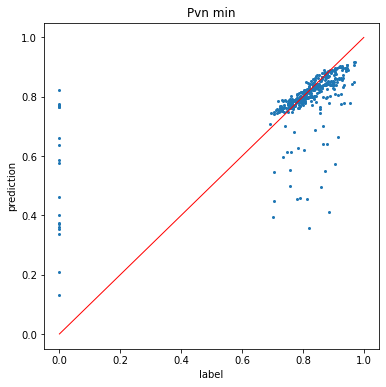

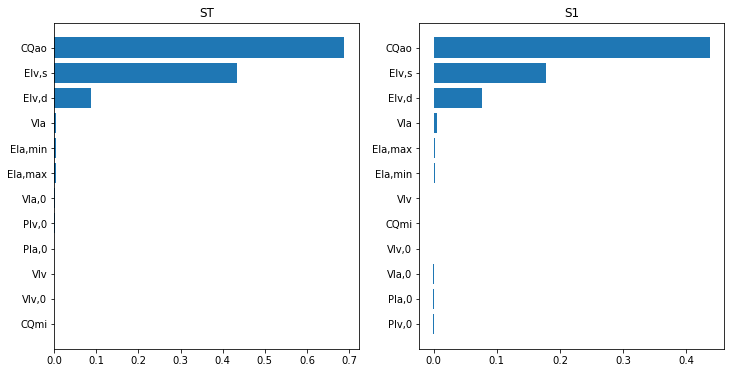

In [15]:
ST = []
S1 = []
for i in Y_columns:
    j = y_columns.index(i)
    print(i)
    n_estimators = [50, 100, 200]
    max_depth = [2, 4, 8]
    min_samples_split = [3, 5]
    learning_rate = [0.1, 0.01]
    param_grid = dict(n_estimators = n_estimators, max_depth = max_depth, 
                      min_samples_split = min_samples_split, learning_rate = learning_rate)

    # feel free to run this cell here and it will not take a lot of time
    grid_regression = GridSearchCV(GradientBoostingRegressor(), param_grid = param_grid, 
                                   cv = 5, scoring = 'neg_mean_squared_error')
    grid_regression.fit(X_train, y_train[:,j])


    # Training a Gradient Boosting using the best value for the n_estimators
    grad_tree_boos_reg = GradientBoostingRegressor(n_estimators = grid_regression.best_params_["n_estimators"], 
                                                   max_depth = grid_regression.best_params_["max_depth"], 
                                                   min_samples_split = grid_regression.best_params_["min_samples_split"], 
                                                   learning_rate = grid_regression.best_params_["learning_rate"])
    grad_tree_boos_reg.fit(X_train, y_train[:,j])
    test_predictions = grad_tree_boos_reg.predict(X_test)


    # Computing the RMSE for the validation dataset
    error_grad_tree_boos_reg = np.sqrt(mean_squared_error(y_test[:,j], test_predictions))
    print('The RMSE on the validation data is :', error_grad_tree_boos_reg)
    
    fig = plt.figure(figsize=(6, 6))
    plt.xlabel('label')
    plt.ylabel('prediction')
    plt.title(i)
    plt.plot(y_test[:,j], test_predictions, "o", markersize=2)
    x = np.linspace(0,1,50)
    y = x
    plt.plot(x,y, color='red', linewidth=1)

    Y = grad_tree_boos_reg.predict(param_values)
    Si = sobol.analyze(problem, Y, print_to_console=True)
    Si_df = Si.to_df()
    fig = plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sorted_idx = np.argsort(Si_df[0]['ST'])
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, Si_df[0]['ST'][sorted_idx], align='center')
    plt.yticks(pos, np.array(X_columns)[sorted_idx])
    plt.title('ST')
    

    plt.subplot(1, 2, 2)
    sorted_idx = np.argsort(Si_df[1]['S1'])
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, Si_df[1]['S1'][sorted_idx], align='center')
    plt.yticks(pos, np.array(X_columns)[sorted_idx])
    plt.title('S1')
    
    
    ST.append(Si_df[0]['ST'].values)
    S1.append(Si_df[1]['S1'].values)
    
    plt.show()

In [16]:
st = pd.DataFrame(ST)
st.columns = ['CQao', 'Plv,0', 'Vlv,0', 'Vlv', 'CQmi', 'Pla,0', 'Vla,0', 'Vla', 'Elv,s', 'Elv,d', 'Ela,max', 'Ela,min']

s1 = pd.DataFrame(S1)
s1.columns = ['CQao', 'Plv,0', 'Vlv,0', 'Vlv', 'CQmi', 'Pla,0', 'Vla,0', 'Vla', 'Elv,s', 'Elv,d', 'Ela,max', 'Ela,min']


In [17]:
dfST = st.drop([5,7])
dfST

,CQao,"Plv,0","Vlv,0",Vlv,CQmi,"Pla,0","Vla,0",Vla,"Elv,s","Elv,d","Ela,max","Ela,min"
0,0.724885,0.006369,0.003780,0.000020,0.002683,8.403399e-03,0.031299,0.013348,0.315245,0.211080,0.012969,0.023726
1,0.739950,0.002068,0.000636,0.000960,0.001128,3.125348e-04,0.000489,0.002268,0.475537,0.015085,0.001274,0.002449
2,0.839408,0.001407,0.010381,0.004463,0.004234,3.383482e-09,0.011525,0.006721,0.319342,0.022365,0.000000,0.003147
3,0.843835,0.002840,0.003489,0.000294,0.000394,3.713162e-04,0.002911,0.002492,0.348681,0.030085,0.000655,0.003104
4,0.603788,0.003145,0.012827,0.002964,0.002247,5.012354e-04,0.040635,0.003914,0.298806,0.461667,0.006971,0.016034
6,0.800810,0.000751,0.007728,0.001270,0.004043,7.456367e-05,0.012754,0.007051,0.273334,0.078462,0.000953,0.007030
8,0.775837,0.001034,0.010002,0.001179,0.001955,6.503330e-05,0.016457,0.008197,0.222544,0.131038,0.000235,0.014610
9,0.805280,0.003277,0.001061,0.000074,0.000394,3.657689e-04,0.002450,0.002205,0.283176,0.108998,0.001659,0.003474
10,0.653050,0.002136,0.005268,0.000000,0.000975,1.136706e-04,0.004213,0.013095,0.409421,0.098182,0.006977,0.013591
11,0.688166,0.000887,0.000484,0.000623,0.000130,6.547362e-04,0.001703,0.004857,0.433188,0.088533,0.003534,0.003645


In [18]:
dfS1 = s1.drop([5,7])
dfS1

,CQao,"Plv,0","Vlv,0",Vlv,CQmi,"Pla,0","Vla,0",Vla,"Elv,s","Elv,d","Ela,max","Ela,min"
0,0.401870,0.001590,0.003290,-0.000043,-0.000831,-6.941456e-04,0.001938,0.004454,0.041418,0.151114,-0.000242,0.011934
1,0.478702,-0.000697,-0.000504,0.002215,0.000189,-3.721382e-04,-0.000319,0.000675,0.187796,0.008389,0.000017,0.001023
2,0.595896,0.000935,0.002410,0.001371,-0.002334,-3.961028e-07,-0.000407,0.003683,0.027865,0.016725,0.000000,0.000912
3,0.579035,-0.000924,0.000710,0.000519,-0.003600,-3.472632e-04,-0.000850,0.000970,0.051382,0.017637,-0.000112,0.000730
4,0.254844,0.000135,0.008512,0.002522,-0.001149,-3.420191e-04,-0.005102,0.000317,0.021647,0.281050,0.002168,0.005177
6,0.608349,0.000484,0.005450,0.000611,-0.002080,-6.379650e-05,-0.002476,0.002977,0.027014,0.062840,-0.000852,0.001309
8,0.598918,-0.003014,0.004402,0.000423,-0.004216,-1.129728e-04,-0.003271,-0.000331,0.020175,0.114465,0.000070,0.000278
9,0.585920,-0.000711,0.000699,0.000212,-0.003329,-3.126170e-04,-0.001760,-0.001176,0.023805,0.092728,-0.001021,0.000471
10,0.432090,-0.001552,0.006583,0.000000,-0.000748,6.870563e-04,0.000377,0.014366,0.168011,0.090359,0.005154,0.006632
11,0.437778,-0.000610,0.000127,0.001212,0.000400,-2.905955e-04,-0.000266,0.005508,0.178547,0.076322,0.002430,0.001982


In [19]:
import seaborn as sns

[Text(0, 0.5, 'Plv max'),
 Text(0, 1.5, 'Plv min'),
 Text(0, 2.5, 'Prv max'),
 Text(0, 3.5, 'Prv min'),
 Text(0, 4.5, 'Qpo max'),
 Text(0, 5.5, 'Qao max'),
 Text(0, 6.5, 'Psvn max'),
 Text(0, 7.5, 'Psvn min'),
 Text(0, 8.5, 'Pvn max'),
 Text(0, 9.5, 'Pvn min')]

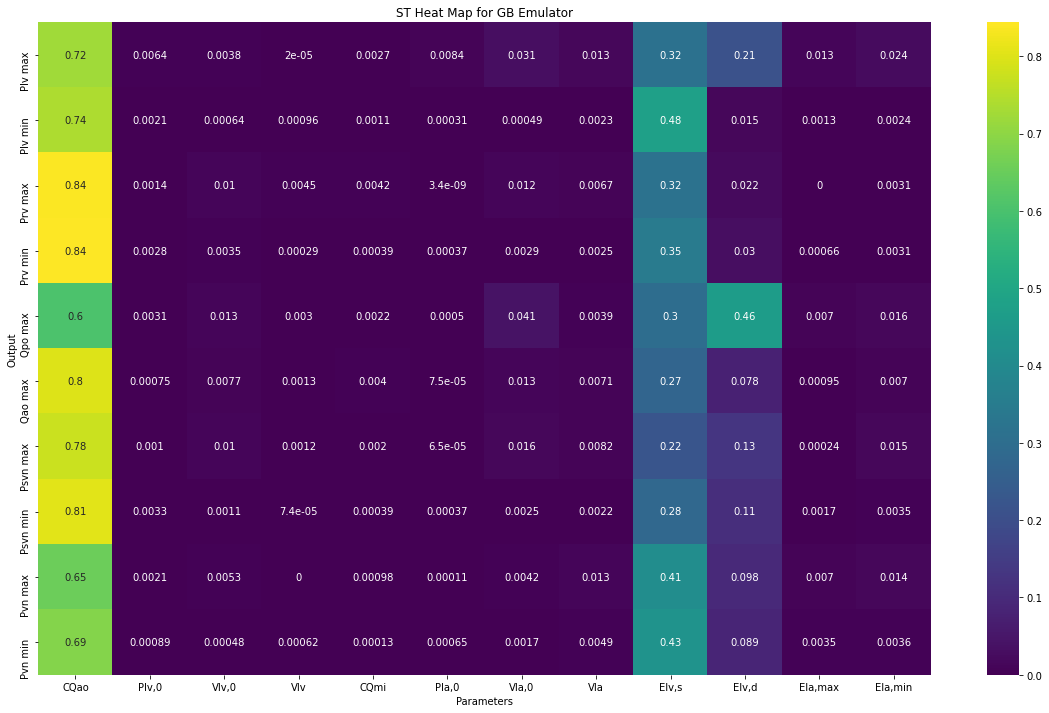

In [22]:
fig, ax1 = plt.subplots(figsize = (20,12))

sns.heatmap(dfST, cmap="viridis", annot=True)
ax1.set_title('ST Heat Map for GB Emulator')
ax1.set_xlabel('Parameters')
ax1.set_ylabel('Output')
ax1.set_yticklabels(['Plv max', 'Plv min', 'Prv max', 'Prv min', 'Qpo max', 'Qao max',
                     'Psvn max', 'Psvn min', 'Pvn max', 'Pvn min'])


[Text(0, 0.5, 'Plv max'),
 Text(0, 1.5, 'Plv min'),
 Text(0, 2.5, 'Prv max'),
 Text(0, 3.5, 'Prv min'),
 Text(0, 4.5, 'Qpo max'),
 Text(0, 5.5, 'Qao max'),
 Text(0, 6.5, 'Psvn max'),
 Text(0, 7.5, 'Psvn min'),
 Text(0, 8.5, 'Pvn max'),
 Text(0, 9.5, 'Pvn min')]

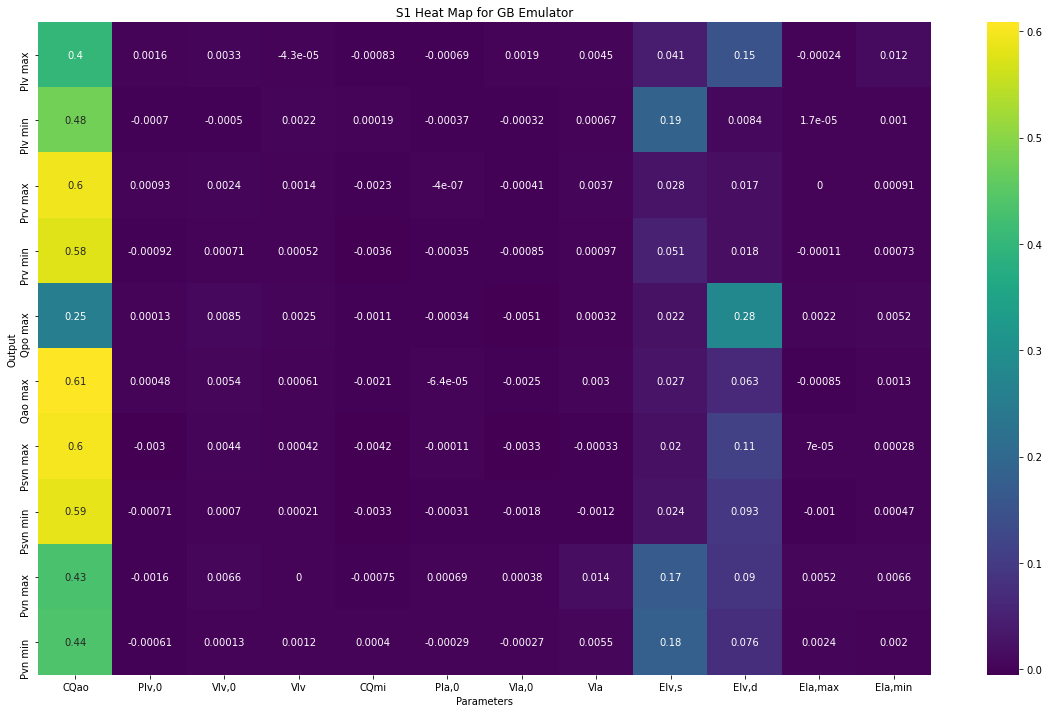

In [23]:
fig, ax = plt.subplots(figsize = (20,12))

sns.heatmap(dfS1, cmap="viridis", annot=True)
ax.set_title('S1 Heat Map for GB Emulator')
ax.set_xlabel('Parameters')
ax.set_ylabel('Output')
ax.set_yticklabels(['Plv max', 'Plv min', 'Prv max', 'Prv min', 'Qpo max', 'Qao max', 
                     'Psvn max', 'Psvn min', 'Pvn max', 'Pvn min'])
